In [313]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

import tensorflow as tf
from tensorflow import keras
import os
import datetime

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [314]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [315]:
file = '2013~2023 한국 기온,습도,풍속.csv'

In [316]:
df = pd.read_csv(file, encoding = 'cp949')

In [317]:
df

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
0,105,강릉,2013-01-01,-1.9,3.8,-6.7,50.6,2.9
1,105,강릉,2013-01-02,-6.0,-1.3,-9.9,29.9,4.4
2,105,강릉,2013-01-03,-7.5,-0.7,-11.1,25.8,4.0
3,105,강릉,2013-01-04,-4.9,1.8,-10.6,31.1,3.2
4,105,강릉,2013-01-05,-1.7,2.8,-5.4,30.4,4.3
...,...,...,...,...,...,...,...,...
62059,184,제주,2023-08-11,29.6,34.1,26.6,64.6,4.0
62060,184,제주,2023-08-12,29.7,33.3,27.2,66.6,2.7
62061,184,제주,2023-08-13,29.2,32.6,26.3,65.3,3.0
62062,184,제주,2023-08-14,28.9,32.3,26.4,69.9,3.4


In [318]:
df.head()

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
0,105,강릉,2013-01-01,-1.9,3.8,-6.7,50.6,2.9
1,105,강릉,2013-01-02,-6.0,-1.3,-9.9,29.9,4.4
2,105,강릉,2013-01-03,-7.5,-0.7,-11.1,25.8,4.0
3,105,강릉,2013-01-04,-4.9,1.8,-10.6,31.1,3.2
4,105,강릉,2013-01-05,-1.7,2.8,-5.4,30.4,4.3


In [319]:
df.tail()

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
62059,184,제주,2023-08-11,29.6,34.1,26.6,64.6,4.0
62060,184,제주,2023-08-12,29.7,33.3,27.2,66.6,2.7
62061,184,제주,2023-08-13,29.2,32.6,26.3,65.3,3.0
62062,184,제주,2023-08-14,28.9,32.3,26.4,69.9,3.4
62063,184,제주,2023-08-15,29.4,32.0,27.0,69.9,2.8


In [320]:
df_korea = df.drop(['지점번호', '지점명'], axis = 1).groupby(['일시']).mean()
df_korea.head(10)

,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
일시,,,,,
2013-01-01,-0.76250,4.43750,-6.21250,73.10000,2.33125
2013-01-02,-4.70000,0.54375,-8.98125,53.29375,3.58750
2013-01-03,-8.09375,-3.99375,-11.26250,48.90000,3.40625
2013-01-04,-6.74375,-1.15000,-11.61875,50.25000,2.03125
2013-01-05,-3.81250,1.75625,-9.41875,57.06250,2.28125
2013-01-06,-2.32500,2.52500,-5.73750,57.04375,1.96875
2013-01-07,-2.00625,3.35000,-6.72500,49.62500,1.95000
2013-01-08,-1.22500,3.76875,-5.28750,50.66250,2.15625
2013-01-09,-4.01875,-0.80625,-7.14375,45.38125,3.41250


In [321]:
df_korea.tail(10)

,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
일시,,,,,
2023-08-06,29.40625,33.70000,26.15625,74.78750,1.95000
2023-08-07,29.28750,33.62500,26.05625,74.49375,2.43750
2023-08-08,29.08125,33.11875,25.81875,71.57500,2.92500
2023-08-09,26.48125,28.96250,24.30625,81.06250,3.91875
2023-08-10,23.74375,25.91875,22.36875,88.73125,4.73125
2023-08-11,26.24375,29.97500,22.85625,79.02500,2.83750
2023-08-12,25.86250,29.23125,23.14375,81.25000,1.88125
2023-08-13,26.88750,31.00625,23.51875,77.77500,1.60000
2023-08-14,27.40000,31.66250,24.34375,77.50000,1.77500


((array([-3.56972766, -3.33033678, -3.19818437, ...,  3.19818437,
          3.33033678,  3.56972766]),
  array([-10.50625,  -9.90625,  -9.3625 , ...,  30.73125,  30.75   ,
          30.81875])),
 (9.094958307648389, 14.32800635902724, 0.980865003814996))

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


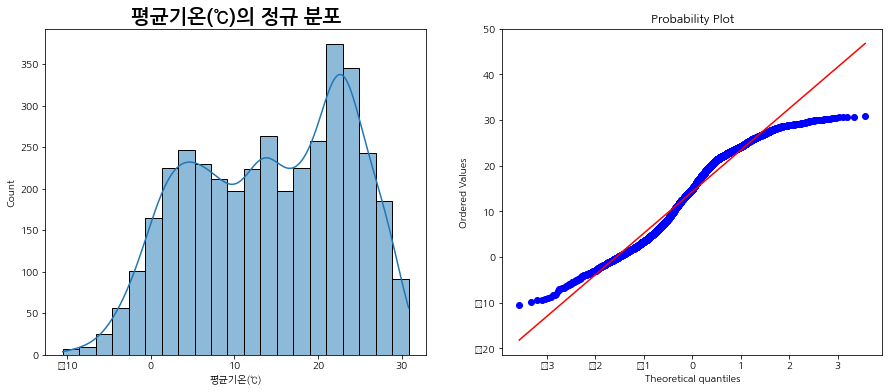

In [322]:
# 우선 종속변수의 분포를 확인

fig, axes = plt.subplots(1,2, figsize = (15,6))

sns.histplot(df_korea['평균기온(℃)'], ax =axes[0], kde=True)
axes[0].set_title('평균기온(℃)의 정규 분포', fontsize = 20, weight='bold')
stats.probplot(df_korea["평균기온(℃)"], dist='norm', fit=True, plot=axes[1])


# 오른쪽 파란색 곡선이 빨간색 직선에 비슷해 질수록 정규분포를 따른다 ==> 그다지 정확하지는 않지만, 얼추 따른다고 생각

((array([-3.56972766, -3.33033678, -3.19818437, ...,  3.19818437,
          3.33033678,  3.56972766]),
  array([-6.75   , -6.2125 , -5.63125, ..., 35.55   , 35.775  , 35.9125 ])),
 (8.977774295898092, 18.995416881498667, 0.9796669519758548))

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


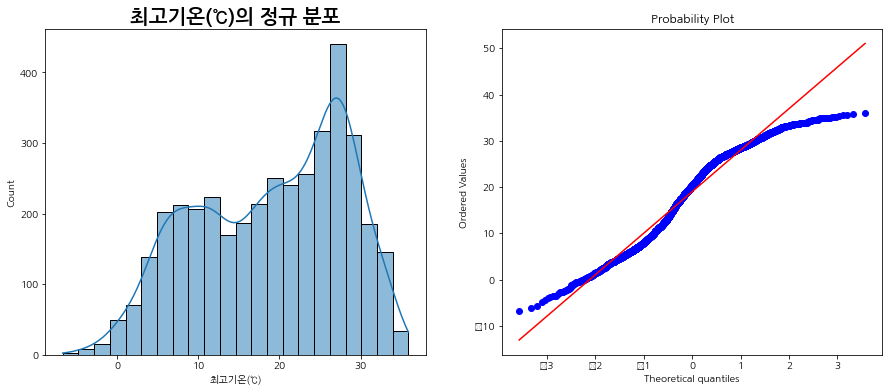

In [323]:
fig, axes = plt.subplots(1,2, figsize = (15,6))

sns.histplot(df_korea['최고기온(℃)'], ax =axes[0], kde=True)
axes[0].set_title('최고기온(℃)의 정규 분포', fontsize = 20, weight='bold')
stats.probplot(df_korea['최고기온(℃)'], dist='norm', fit=True, plot=axes[1])

((array([-3.56972766, -3.33033678, -3.19818437, ...,  3.19818437,
          3.33033678,  3.56972766]),
  array([-14.0125 , -13.89375, -12.95   , ...,  27.275  ,  27.28125,
          27.39375])),
 (9.451826563832375, 10.346755392283232, 0.9808902285789063))

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


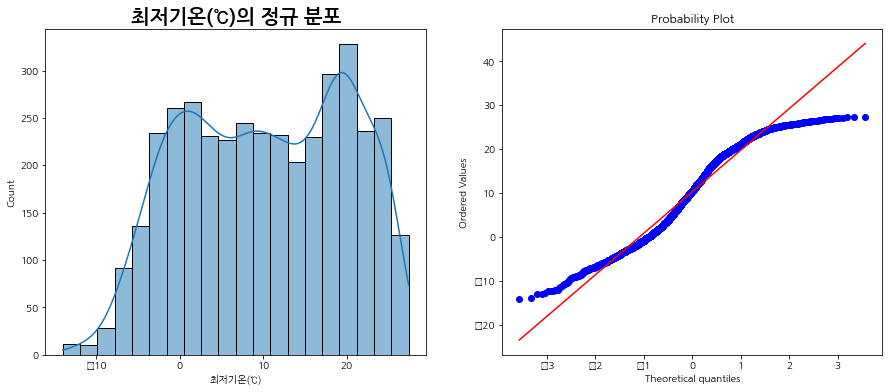

In [324]:
fig, axes = plt.subplots(1,2, figsize = (15,6))

sns.histplot(df_korea['최저기온(℃)'], ax =axes[0], kde=True)
axes[0].set_title('최저기온(℃)의 정규 분포', fontsize = 20, weight='bold')
stats.probplot(df_korea['최저기온(℃)'], dist='norm', fit=True, plot=axes[1])

((array([-3.56972766, -3.33033678, -3.19818437, ...,  3.19818437,
          3.33033678,  3.56972766]),
  array([1.1    , 1.1625 , 1.19375, ..., 5.79375, 5.8375 , 5.925  ])),
 (0.7003152942903524, 2.3620059631225523, 0.951351680881359))

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


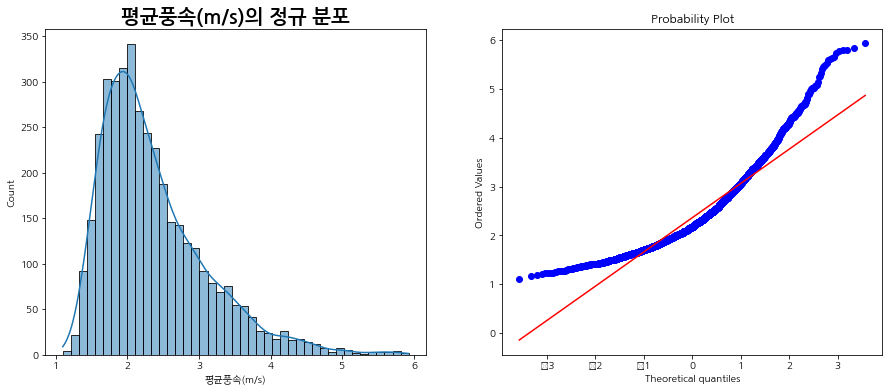

In [325]:
fig, axes = plt.subplots(1,2, figsize = (15,6))

sns.histplot(df_korea['평균풍속(m/s)'], ax =axes[0], kde=True)
axes[0].set_title('평균풍속(m/s)의 정규 분포', fontsize = 20, weight='bold')
stats.probplot(df_korea['평균풍속(m/s)'], dist='norm', fit=True, plot=axes[1])

In [326]:
# 평균 풍속은 아래로 볼록한 형태를 보인다.

((array([-3.56972766, -3.33033678, -3.19818437, ...,  3.19818437,
          3.33033678,  3.56972766]),
  array([32.15   , 32.5    , 32.71875, ..., 94.975  , 95.21875, 96.025  ])),
 (13.113876912292294, 66.77656848844205, 0.9929046245201671))

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


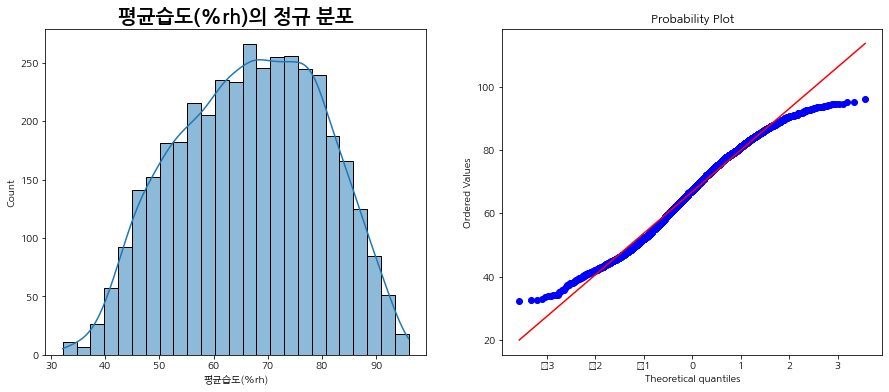

In [327]:
fig, axes = plt.subplots(1,2, figsize = (15,6))

sns.histplot(df_korea['평균습도(%rh)'], ax =axes[0], kde=True)
axes[0].set_title('평균습도(%rh)의 정규 분포', fontsize = 20, weight='bold')
stats.probplot(df_korea['평균습도(%rh)'], dist='norm', fit=True, plot=axes[1])

## 기온데이터만 가지고 예측 모델 만들기
#### 월별에서 일별이 되었을 때, 할 수 있는 것이 무엇이 있을까?
#### 1. 1 ~ 6일의 기온으로 다음 7일을 예측하는 모델을 만들자는 생각
#### <span style='background-color:#fff5b1'>1번의 생각은 몇년 후를 예측하기에는 정확도가 많이 떨어진다. 따라서 2013-01-01 ~ 2022-01-01로 2023-01-01을 예측하는 식으로 가보자</span>
#### 2. 2022년까지의 데이터를 가지고 2023년 1년을 에측하는 모델을 만들어보자
#### 2-1. train data = 2013 ~ 2022, test data = 2023
#### 3. 일단 train 및 test 일별데이터가 어떻게 분포하는지 시각화 필요

In [328]:
# 윤달 drop
df_korea.drop(['2016-02-29', '2020-02-29'], axis = 0, inplace = True)

In [329]:
df_korea = df_korea.reset_index()

In [330]:
df_korea.loc[:, '일시'] = pd.to_datetime(df_korea.loc[:, '일시']).dt.strftime('%Y-%m-%d')
df_korea

,일시,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
0,2013-01-01,-0.76250,4.43750,-6.21250,73.10000,2.33125
1,2013-01-02,-4.70000,0.54375,-8.98125,53.29375,3.58750
2,2013-01-03,-8.09375,-3.99375,-11.26250,48.90000,3.40625
3,2013-01-04,-6.74375,-1.15000,-11.61875,50.25000,2.03125
4,2013-01-05,-3.81250,1.75625,-9.41875,57.06250,2.28125
...,...,...,...,...,...,...
3872,2023-08-11,26.24375,29.97500,22.85625,79.02500,2.83750
3873,2023-08-12,25.86250,29.23125,23.14375,81.25000,1.88125
3874,2023-08-13,26.88750,31.00625,23.51875,77.77500,1.60000
3875,2023-08-14,27.40000,31.66250,24.34375,77.50000,1.77500


In [331]:
df_korea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   일시         3877 non-null   object 
 1   평균기온(℃)    3877 non-null   float64
 2   최고기온(℃)    3877 non-null   float64
 3   최저기온(℃)    3877 non-null   float64
 4   평균습도(%rh)  3877 non-null   float64
 5   평균풍속(m/s)  3877 non-null   float64
dtypes: float64(5), object(1)
memory usage: 181.9+ KB


In [332]:
filter1 = df_korea['일시'] == '2023-01-01'
filter2 = df_korea['일시'] == '2018-01-01'
test_data = df_korea.iloc[df_korea[filter1].index[0]:]
val_data = df_korea.iloc[df_korea[filter2].index[0]:df_korea[filter1].index[0]]
train_data = df_korea.iloc[:df_korea[filter2].index[0]]

In [333]:
train_data = train_data.set_index('일시')
test_data = test_data.set_index('일시')
val_data = val_data.set_index('일시')

In [334]:
train_data = round(train_data.iloc[:, :], 1)
test_data = round(test_data.iloc[:, :], 1)
val_data = round(val_data.iloc[:, :], 1)

In [335]:
train_data, val_data, test_data

(            평균기온(℃)  최고기온(℃)  최저기온(℃)  평균습도(%rh)  평균풍속(m/s)
 일시                                                         
 2013-01-01     -0.8      4.4     -6.2       73.1        2.3
 2013-01-02     -4.7      0.5     -9.0       53.3        3.6
 2013-01-03     -8.1     -4.0    -11.3       48.9        3.4
 2013-01-04     -6.7     -1.2    -11.6       50.2        2.0
 2013-01-05     -3.8      1.8     -9.4       57.1        2.3
 ...             ...      ...      ...        ...        ...
 2017-12-27     -2.8      1.2     -6.3       35.6        2.9
 2017-12-28      0.3      4.1     -4.3       47.6        1.9
 2017-12-29      4.2      8.6      0.0       67.0        1.8
 2017-12-30      4.5      8.1      1.1       74.2        1.5
 2017-12-31      3.1      6.4      0.1       53.7        3.1
 
 [1825 rows x 5 columns],
             평균기온(℃)  최고기온(℃)  최저기온(℃)  평균습도(%rh)  평균풍속(m/s)
 일시                                                         
 2018-01-01      1.2      5.7     -2.4       46.9        

In [336]:
train_data.iloc

In [337]:
tr_temp = train_data['평균기온(℃)']
te_temp = test_data['평균기온(℃)']
val_temp = val_data['평균기온(℃)']

In [338]:
train = list(train_data['평균기온(℃)'])
test = list(test_data['평균기온(℃)'])
val = list(val_data['평균기온(℃)'])
train = {0 : train}
test = {0 : test}
val = {0 : val}
tr_temp = pd.DataFrame(train)
te_temp = pd.DataFrame(test) 
val_temp = pd.DataFrame(val)
print(tr_temp)

        0
0    -0.8
1    -4.7
2    -8.1
3    -6.7
4    -3.8
...   ...
1820 -2.8
1821  0.3
1822  4.2
1823  4.5
1824  3.1

[1825 rows x 1 columns]


In [339]:
def maketimeSeries(df, n_in = 6):
    for i in range(1, n_in+1):
        df[i] = df[i-1].shift(1)
    return df

In [344]:
maketimeSeries(tr_temp, 24)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-4.3,-0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.1,-4.3,-0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9.6,-1.1,-4.3,-0.8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.9,9.6,-1.1,-4.3,-0.8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,23.0,29.3,26.5,23.1,21.4,14.9,8.4,0.9,-3.4,-1.3,...,28.8,27.8,24.5,21.4,15.8,15.6,9.9,1.5,0.1,2.1
69,21.4,23.0,29.3,26.5,23.1,21.4,14.9,8.4,0.9,-3.4,...,23.3,28.8,27.8,24.5,21.4,15.8,15.6,9.9,1.5,0.1
70,16.8,21.4,23.0,29.3,26.5,23.1,21.4,14.9,8.4,0.9,...,18.2,23.3,28.8,27.8,24.5,21.4,15.8,15.6,9.9,1.5
71,7.8,16.8,21.4,23.0,29.3,26.5,23.1,21.4,14.9,8.4,...,6.7,18.2,23.3,28.8,27.8,24.5,21.4,15.8,15.6,9.9


In [340]:
tr_temp = np.reshape(tr_temp, (73, 25))
val_temp = np.reshape(val_temp, (73, 25))
te_temp = np.reshape(te_temp[:-2], (45, 5))

In [343]:
tr_temp = pd.DataFrame(tr_temp)
te_temp = pd.DataFrame(te_temp)
val_temp = pd.DataFrame(val_temp)

In [247]:
x_train = tr_temp[:, ] 
y_train =
x_test = 
y_test = 

,0,1,2,3,4
0,1.9,-0.6,-1.1,0.6,1.6
1,3.2,3.8,3.2,5.0,3.8
2,5.1,8.3,11.5,7.9,2.2
3,-1.4,-0.8,0.6,1.7,0.5
4,-1.7,1.6,2.7,-8.9,-8.4
5,-2.6,-3.6,-3.8,0.4,1.2
6,3.5,4.4,0.6,1.3,1.3
7,2.5,4.4,5.2,4.2,5.0
8,4.6,4.1,5.3,6.3,3.3
9,3.1,3.9,5.1,7.4,5.7


In [248]:
x_train = np.reshape(tr_temp, (tr_temp.shape[0], (tr_temp.shape[1]-1), 1))
x_val = np.reshape(val_data, (val_data.shape[0], val_data.shape[1], 1))
x_test = np.reshape(test_data, (test_data.shape[0], test_data.shape[1], 1))

In [249]:
x_train

array([[[ -0.8],
        [  4.4],
        [ -6.2],
        [ 73.1],
        [  2.3]],

       [[ -4.7],
        [  0.5],
        [ -9. ],
        [ 53.3],
        [  3.6]],

       [[ -8.1],
        [ -4. ],
        [-11.3],
        [ 48.9],
        [  3.4]],

       ...,

       [[  4.2],
        [  8.6],
        [  0. ],
        [ 67. ],
        [  1.8]],

       [[  4.5],
        [  8.1],
        [  1.1],
        [ 74.2],
        [  1.5]],

       [[  3.1],
        [  6.4],
        [  0.1],
        [ 53.7],
        [  3.1]]])